In [1]:
import numpy as np
from matplotlib import pyplot as plt

import os
import json

In [8]:
def load_data(test_name, scene_name, file_name="train_results.json"):
	file = open(os.path.join("..", "..", "output", test_name, scene_name, "model", file_name))
	data = json.load(file)
	file.close()

	return data

test_name = "gaussian_masks"
unpolarized = load_data(test_name, "unpolarized")
indirect = load_data(test_name, "global")
direct = load_data(test_name, "direct")
combined = load_data(test_name, "global", "train_results_combined.json")

In [9]:
def plot_metric(data, metric, label):
	if type(data[metric]) == list:
		plt.plot(data[metric], label=label)
	else:
		plt.plot(data[metric]["iteration"], data[metric]["value"], label=label)

def plot_graph(data, metric):
	plot_metric(data[0], metric, "unpolarized")
	plot_metric(data[1], metric, "global")
	plot_metric(data[2], metric, "direct")

	if len(data) > 3:
		plot_metric(data[3], metric, "composite")

	plt.xlabel("iteration")
	plt.ylabel(metric)
	plt.grid()
	plt.legend()
	plt.show()

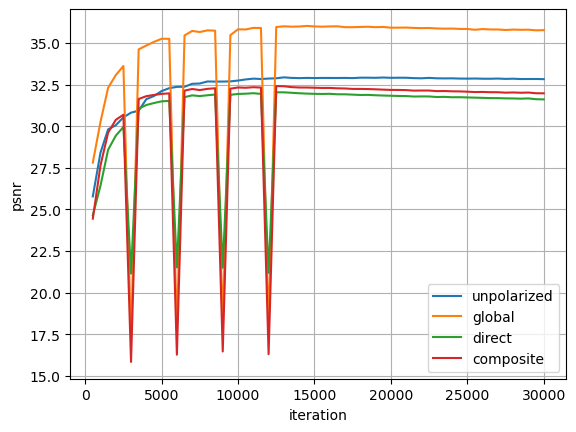

In [10]:
# PSNR
plot_graph((unpolarized, indirect, direct, combined), "psnr")

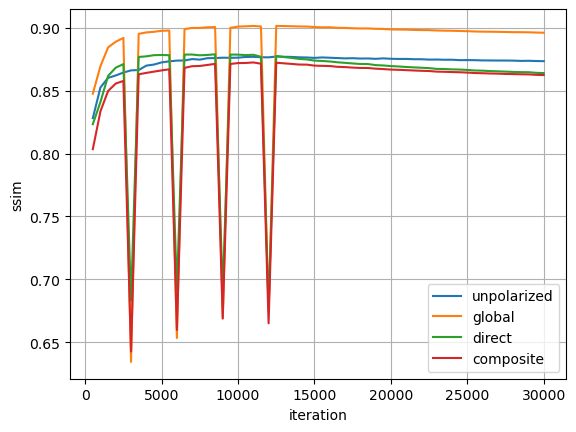

In [11]:
# SSIM
plot_graph((unpolarized, indirect, direct, combined), "ssim")

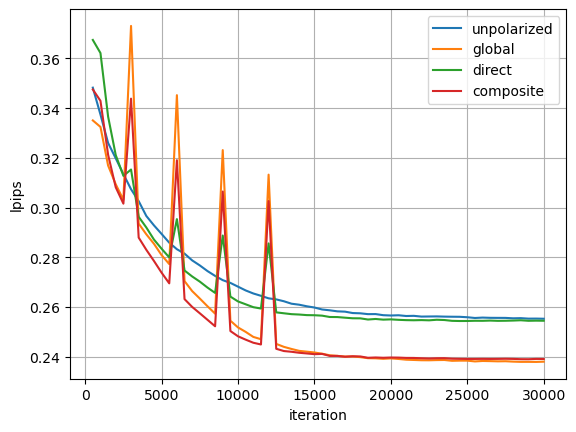

In [12]:
# LPIPS
plot_graph((unpolarized, indirect, direct, combined), "lpips")

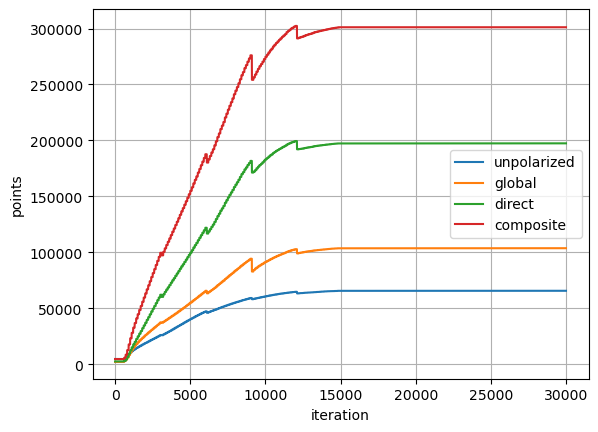

In [13]:
# Total Points
plot_graph((unpolarized, indirect, direct, combined), "points")

In [ ]:
path = "../../output/0812_train_tandem_2/results"

def load_per_view(path, scenes, metric):
	result = []

	for scene in scenes:
		with open(os.path.join(path, scene, "per_view.json")) as fp:
			result.append(json.load(fp)["ours_30000"][metric])

	return result

scenes = ["unpolarized", "combined", "indirect", "direct"]
data = load_per_view(path, scenes, "LPIPS")

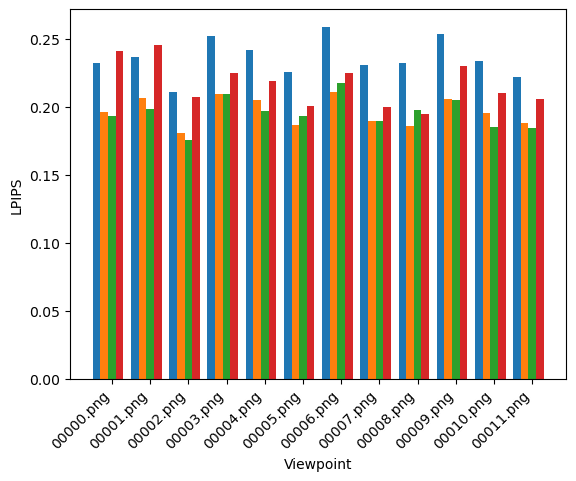

In [64]:
def plot_bar_chart(data):
	num_bars_per_group = len(data)

	keys = list(data[0].keys())
	x = np.arange(len(keys))

	total_width = 0.8
	start = -0.4
	width = total_width / num_bars_per_group

	for i, dp in enumerate(data):
		plt.bar(x + start + i * width, list(dp.values()), width)

	plt.xticks(x, keys, rotation=45, ha="right")
	plt.xlabel("Viewpoint")
	plt.ylabel("LPIPS")

	plt.show()

plot_bar_chart(data)

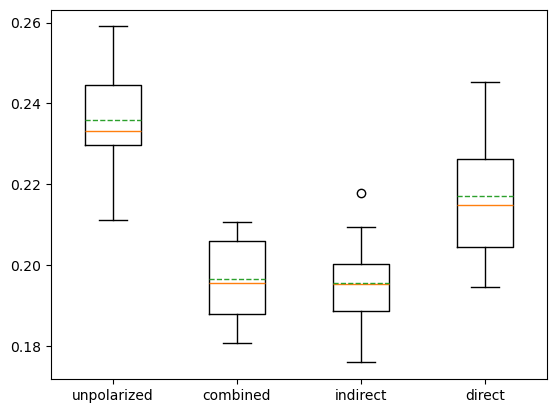

In [6]:
def plot_boxplot(data, scenes):
	values = [np.array(list(x.values())) for x in data]
	values = np.stack(values).transpose()

	fig, ax = plt.subplots()
	ax.boxplot(values, tick_labels=scenes, showmeans=True, meanline=True)
	return fig
	# plt.savefig(os.path.join(path, "test.svg"))
	# plt.show()

fig = plot_boxplot(data, scenes)
fig.show()